<a href="https://colab.research.google.com/github/HyeonhoonLee/Colab/blob/master/KIOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KIOM 한의임상정보은행 data 분석하기

일단 데이터를 추출해서 상관분석을 전부 돌려보자.

# 라이브러리 로드

In [1]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn 을 불러옵니다.
# 또, 구 버전의 주피터 노트북에서는 %matplotlib inline 설정을 되어야 노트북 안에서 그래프를 시각화 합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#한글 폰트 설정

In [2]:
# Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# 로컬 아나콘다 사용 시에는 그대로 주석처리 해놓으시면 됩니다.
# 나눔고딕 설치
# 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 colab에서는 오류가 발생하니
# 아래에 있는 폰트 설정은 꼭 주석처리를 해주세요. 
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumGothic') 
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

#디렉토리 설정

In [4]:
# 디렉토리를 설정해줍니다.
import os

os.chdir = "/content/drive/My Drive/DataCollection/KIOM/"

#데이터 불러오기

- 데이터 로드 주소: https://www.data.go.kr/data/3072201/fileData.do
- 임상정보은행 사이트에서 상세이용방법 확인가능 (https://kdc.kiom.re.kr/html/?pmode=subpage&MMC_pid=200&spSeq=22)

In [5]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.

##UTF-8이 아니면, encoding=에다가 cp949나 euc-kr을 넣어줘야한다.
df = pd.read_csv("/content/drive/My Drive/DataCollection/KIOM/data/한의임상정보은행 교육용 데이터 (2016.10.27)..csv", encoding="cp949")
df.shape

(500, 73)

In [6]:
# sample, head, tail을 통해 데이터를 미리보기 합니다.
df.sample(5)

,대상자식별코드,성별,만나이,직업분류,학력,결혼유무,음주력,흡연력,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,고혈압_진단,당뇨_진단,고지혈증_진단,일반건강,수면시간(시간),수면시간(분),피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,한의사체질진단,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,늑골둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,혈당,총콜레스테롤,중성지방,고밀도콜레스테롤,저밀도콜레스테롤
436,KDCT00437,2,37.121,3,5,2,999,999,3,2,2,1,2,3,2,3,3,1,1,1,3,1,2,2,1,3,2,3,2,1,2,3,3,1.0,3,3,3,3,4,1,8,1,1,1,1,5,6,0,4,1,1,0,0,0,2,156.1,48.0,19.7,54.5,31.8,74.0,75.5,64.0,73.0,80.3,87.0,120,80,94,146,64,42,91
459,KDCT00460,2,73.353,14,2,2,999,999,3,3,1,3,3,3,3,1,2,1,3,1,1,1,3,2,3,1,3,2,3,2,2,2,3,2.0,1,1,1,2,3,3,12,2,1,1,1,5,5,0,1,0,0,0,0,0,3,155.9,58.4,24.0,53.0,34.3,89.8,93.6,86.5,98.2,99.6,98.5,125,85,113,203,68,57,132
315,KDCT00316,2,38.079,3,5,2,999,999,3,2,2,2,1,2,3,3,2,3,2,2,2,1,2,3,1,1,3,3,1,2,2,3,3,0.0,1,1,1,1,1,2,16,3,1,1,1,4,8,0,2,0,0,0,1,0,3,164.0,63.0,23.4,58.0,34.6,89.1,90.1,79.3,77.3,88.1,97.3,86,55,99,192,77,40,119
392,KDCT00393,2,35.455,14,5,2,999,999,2,1,2,1,2,3,2,2,3,3,2,2,2,1,3,2,2,1,2,1,1,2,2,3,2,1.0,1,1,1,2,1,1,13,3,1,1,1,3,6,30,2,0,0,1,0,0,1,155.3,62.0,25.7,57.0,36.0,95.7,97.4,85.1,83.2,90.0,91.5,110,77,85,178,53,42,113
382,KDCT00383,2,25.485,14,5,1,999,999,1,1,1,2,2,1,1,3,1,2,2,3,1,2,3,2,3,1,4,3,2,2,2,2,2,0.0,3,1,2,2,3,3,12,2,1,1,1,4,5,0,2,0,0,1,0,0,1,161.7,53.0,20.3,53.7,30.5,81.5,83.0,70.0,65.0,84.0,94.0,100,70,110,226,71,65,128


#기본정보 보기

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   대상자식별코드        500 non-null    object 
 1   성별             500 non-null    int64  
 2   만나이            500 non-null    float64
 3   직업분류           500 non-null    int64  
 4   학력             500 non-null    int64  
 5   결혼유무           500 non-null    int64  
 6   음주력            500 non-null    int64  
 7   흡연력            500 non-null    int64  
 8   성격_대범_섬세       500 non-null    int64  
 9   성격_행동빠름_행동느림   500 non-null    int64  
 10  성격_적극_소극       500 non-null    int64  
 11  성격_직접_간접       500 non-null    int64  
 12  성격_포기빠름_포기느림   500 non-null    int64  
 13  성격_외향_내성       500 non-null    int64  
 14  성격_동적_정적       500 non-null    int64  
 15  성격_쉽게_어렵게      500 non-null    int64  
 16  성격_남성적_여성적     500 non-null    int64  
 17  성격_참을성부족_잘찾음   500 non-null    int64  
 18  성격_큰편_적은편 

In [8]:
# 컬럼들을 한번에 확인합니다.
df.columns

Index(['대상자식별코드', '성별', '만나이', '직업분류', '학력', '결혼유무', '음주력', '흡연력', '성격_대범_섬세',
       '성격_행동빠름_행동느림', '성격_적극_소극', '성격_직접_간접', '성격_포기빠름_포기느림', '성격_외향_내성',
       '성격_동적_정적', '성격_쉽게_어렵게', '성격_남성적_여성적', '성격_참을성부족_잘찾음', '성격_큰편_적은편',
       '성격_잘드러냄_안드러냄', '성격_잘표현_표현안하는편', '성격_가끔흥분_이성적', '성격_덜렁_꼼꼼', '식사량',
       '식사속도', '소화여부', '소화입맛', '땀정도', '땀기분', '대변습관', '대변굳기', '배변시긴박감',
       '배변후잔변감', '소변야간뇨', '한열민감도', '한열손부위', '한열발부위', '한열배부위', '음수정도', '음수온다',
       '한열점수', '한열그룹', '고혈압_진단', '당뇨_진단', '고지혈증_진단', '일반건강', '수면시간(시간)',
       '수면시간(분)', '피로정도', '피로_기상시', '피로_오전', '피로_오후', '피로_밤', '피로_하루종일',
       '한의사체질진단', '키', '몸무게', 'BMI', '이마둘레', '목둘레', '겨드랑이둘레', '가슴둘레', '늑골둘레',
       '허리둘레', '장골둘레', '곡골둘레', '수축기혈합', '이완기혈압', '혈당', '총콜레스테롤', '중성지방',
       '고밀도콜레스테롤', '저밀도콜레스테롤'],
      dtype='object')

In [9]:
# dtypes 를 통해 데이터 형식만 출력합니다.
df.dtypes

대상자식별코드      object
성별            int64
만나이         float64
직업분류          int64
학력            int64
             ...   
혈당            int64
총콜레스테롤        int64
중성지방          int64
고밀도콜레스테롤      int64
저밀도콜레스테롤      int64
Length: 73, dtype: object

#결측치 보기

In [10]:
# 데이터 메뉴얼 상 결측치를 999로 표현하였다고 하였습니다.
# 999를 NaN 값으로 바꿔줍니다. 
df = df.replace(999, pd.np.nan)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   대상자식별코드        500 non-null    object 
 1   성별             500 non-null    int64  
 2   만나이            500 non-null    float64
 3   직업분류           500 non-null    int64  
 4   학력             500 non-null    int64  
 5   결혼유무           500 non-null    int64  
 6   음주력            26 non-null     float64
 7   흡연력            26 non-null     float64
 8   성격_대범_섬세       500 non-null    int64  
 9   성격_행동빠름_행동느림   500 non-null    int64  
 10  성격_적극_소극       500 non-null    int64  
 11  성격_직접_간접       500 non-null    int64  
 12  성격_포기빠름_포기느림   500 non-null    int64  
 13  성격_외향_내성       500 non-null    int64  
 14  성격_동적_정적       499 non-null    float64
 15  성격_쉽게_어렵게      499 non-null    float64
 16  성격_남성적_여성적     500 non-null    int64  
 17  성격_참을성부족_잘찾음   500 non-null    int64  
 18  성격_큰편_적은편 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# 결측치 보기
df.isnull().sum()

대상자식별코드     0
성별          0
만나이         0
직업분류        0
학력          0
           ..
혈당          3
총콜레스테롤      3
중성지방        3
고밀도콜레스테롤    3
저밀도콜레스테롤    3
Length: 73, dtype: int64

In [12]:
# 데이터의 통계량 요약
df.describe()

,성별,만나이,직업분류,학력,결혼유무,음주력,흡연력,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,고혈압_진단,당뇨_진단,고지혈증_진단,일반건강,수면시간(시간),수면시간(분),피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,한의사체질진단,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,늑골둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,혈당,총콜레스테롤,중성지방,고밀도콜레스테롤,저밀도콜레스테롤
count,500.000000,500.000000,500.000000,500.000000,500.000000,26.0,26.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,499.000000,499.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,421.000000,474.000000,500.000000,500.00000,500.000000,498.000000,500.000000,500.000000,267.000000,267.000000,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.000000,499.000000,499.000000,500.000000,500.000000,500.00000,499.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,1.672000,48.069266,8.882000,3.824000,1.858000,2.0,2.615385,2.176000,1.65400,1.716000,1.886000,1.904000,2.184000,1.933868,2.064128,1.968000,2.346000,1.842000,2.162000,1.872000,1.704000,2.220000,2.078385,1.658228,1.554000,2.53600,2.176000,1.945783,1.412000,2.060000,2.490637,2.314607,0.964200,1.792000,2.102000,2.302000,2.302000,2.288577,2.016000,11.176353,2.002004,1.264000,1.086000,1.14600,3.392786,6.40000,3.020000,2.820000,0.268000,0.188000,0.438000,0.136000,0.112000,1.950000,160.97000,60.706400,23.371800,55.709400,34.745600,89.906400,90.988800,81.138000,83.340600,89.708600,93.276800,119.726000,76.18600,98.297787,186.162978,124.738431,48.418511,107.609658
std,0.469955,16.255799,5.192109,1.425865,0.571392,0.8,0.637302,0.728069,0.73985,0.759274,0.859349,0.789957,0.821885,0.862910,0.847804,0.819952,0.784548,0.793912,0.846871,0.812981,0.790971,0.782832,0.508062,0.736590,0.869826,0.75488,0.803938,0.836222,0.492688,0.590845,0.668087,0.703303,1.038506,0.798757,0.827627,0.772003,0.715416,0.871739,0.759538,2.782071,0.797836,0.441241,0.280645,0.35346,0.832346,1.34894,9.167753,0.917215,0.443361,0.391103,0.496638,0.343132,0.315682,0.865447,7.97925,10.357766,3.255029,1.921947,3.280354,7.874771,8.271645,9.230041,9.532691,7.728651,6.574386,15.963979,11.14036,25.928326,34.194999,81.124233,12.349330,30.422902
min,1.000000,10.008000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,140.00000,32.000000,15.600000,51.000000,27.000000,66.000000,64.000000,59.900000,60.000000,69.900000,74.000000,79.000000,42.00000,54.000000,110.000000,28.000000,23.000000,25.000000
25%,1.000000,37.351000,3.000000,3.000000,2.000000,1.0,2.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.00000,1.750000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.00000,3.000000,5.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,155.67500,54.000000,21.200000,54.400000,32.200000,85.000000,86.175000,74.975000,76.650000,84.000000,89.000000,110.000000,70.00000,85.000000,160.000000,71.000000,39.000000,86.000000
50%,2.000000,49.798500,8.000000,4.000000,2.000000,2.0,3.000000,2.000000,1.00000,2.000000,2.00000

# data 시각화

In [13]:
df_corr = df.corr()
df_corr

,성별,만나이,직업분류,학력,결혼유무,음주력,흡연력,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,고혈압_진단,당뇨_진단,고지혈증_진단,일반건강,수면시간(시간),수면시간(분),피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,한의사체질진단,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,늑골둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,혈당,총콜레스테롤,중성지방,고밀도콜레스테롤,저밀도콜레스테롤
성별,1.000000,0.003177,0.239529,-0.116228,0.102332,0.531148,0.923186,-0.059366,0.030294,0.103473,0.046168,-0.079589,-0.082101,-0.058625,0.108387,0.326349,0.009479,-0.042497,-0.153234,-0.041920,-0.046062,-0.103061,0.075823,0.120105,0.175781,0.118085,0.169013,0.134023,0.134742,-0.073327,-0.190943,-0.190418,0.037484,0.084820,0.106799,0.096818,0.265410,0.225893,-0.097554,-0.284821,-0.250223,-0.132439,-0.089587,-0.012740,0.108040,-0.083455,0.039667,0.151004,-0.029316,0.107200,-0.035787,0.065915,0.072511,0.023651,-0.684974,-0.502990,-0.112566,-0.466726,-0.651037,-0.484082,-0.227418,-0.427425,-0.219344,-0.057597,-0.049817,-0.250539,-0.225262,-0.047233,0.139834,-0.174496,0.287721,0.083252
만나이,0.003177,1.000000,0.147697,-0.406407,0.614829,0.327213,-0.189104,-0.061938,-0.135251,-0.153808,-0.132564,-0.059230,0.025586,-0.004419,-0.101127,-0.069425,-0.021642,0.120701,0.043324,0.013868,0.044408,0.147783,0.168286,0.030563,-0.087802,0.234163,-0.093412,0.065490,-0.127034,-0.011762,0.131110,0.183574,0.471947,-0.040090,-0.004438,-0.100843,-0.028987,-0.018669,-0.067824,0.010132,-0.003827,0.415019,0.261685,0.237711,0.176873,-0.164051,-0.133854,-0.079706,-0.182660,-0.099375,0.065305,-0.080726,0.007663,-0.060571,-0.247998,0.085012,0.302357,-0.066941,0.260226,0.304519,0.441300,0.483400,0.473170,0.404428,0.218248,0.308363,0.248721,0.312489,0.287570,0.332996,-0.186973,0.266348
직업분류,0.239529,0.147697,1.000000,-0.360667,0.038248,0.466358,0.148132,-0.077726,0.021695,-0.008009,-0.039402,-0.046253,-0.022140,-0.038199,-0.030059,0.092786,-0.032266,-0.015714,0.003445,0.008284,0.007093,-0.031072,0.151319,0.075163,0.004298,0.159845,-0.013258,0.080435,0.102083,-0.055174,-0.032669,0.059338,0.162077,0.024029,-0.001391,0.010408,0.021482,-0.007596,0.032494,0.011352,0.006837,0.025871,0.042736,-0.016801,0.044669,0.052533,0.012133,-0.054545,-0.072420,0.039566,-0.010226,-0.047217,0.059431,0.003144,-0.299614,-0.151949,0.026720,-0.115884,-0.145796,-0.074159,0.026585,-0.007308,0.066560,0.081218,0.045483,-0.051599,-0.076153,0.086417,0.033256,0.006470,-0.036428,0.018726
학력,-0.116228,-0.406407,-0.360667,1.000000,-0.205377,-0.545108,-0.032898,0.147653,0.050440,0.109228,0.140601,-0.006135,0.036239,0.033357,0.069058,0.082592,-0.092352,-0.047628,-0.090853,-0.000456,-0.067607,-0.044238,-0.197860,0.023381,0.030300,-0.148635,0.163438,-0.090608,0.043520,0.048241,-0.050756,-0.112647,-0.311205,-0.056841,0.010148,0.044742,0.022742,0.005479,-0.015899,-0.052331,-0.054354,-0.231785,-0.097315,-0.064225,-0.030848,0.076268,0.036143,0.058473,0.119142,0.098982,0.007199,-0.008323,-0.085232,0.116277,0.367475,0.123584,-0.117826,0.113294,-0.009549,-0.041610,-0.154568,-0.203504,-0.242552,-0.175277,-0.043214,-0.117543,-0.036792,-0.200377,-0.077611,-0.191588,0.174922,-0.081218
결혼유무,0.102332,0.614829,0.038248,-0.205377,1.000000,0.000000,-0.283629,0.002389,-0.125935,-0.120857,-0.045278,-0.048021,-0.008262,-0.043517,-0.043263,-0.031105,0.015941,0.087390,0.060059,0.008248,0.053138,0.061020,0.109639,0.005383,-0.107520,0.148935,-0.037099,-0.012611,-0.097866,0.031223,0.068528,0.093698,0.344333,0.001019,-0.028638,-0.079767,0.060995,-0.014141,-0.073254,-0.023320,-0.016976,0.260268,0.176284,0.172316,0.124690,-0.095160,-0.067170,-0.041220,-0.094705,-0.032749,0.071312,0.027148,-0.078303,0.034244,-0.182248,0.025617,0.173149,-0.081630,0.102145,0.174478,0.239863,0.244859,0.275710,0.219325,0.108856,0.120734,0.121901,0.152707,0.193292,0.196111,-0.113561,0.194108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

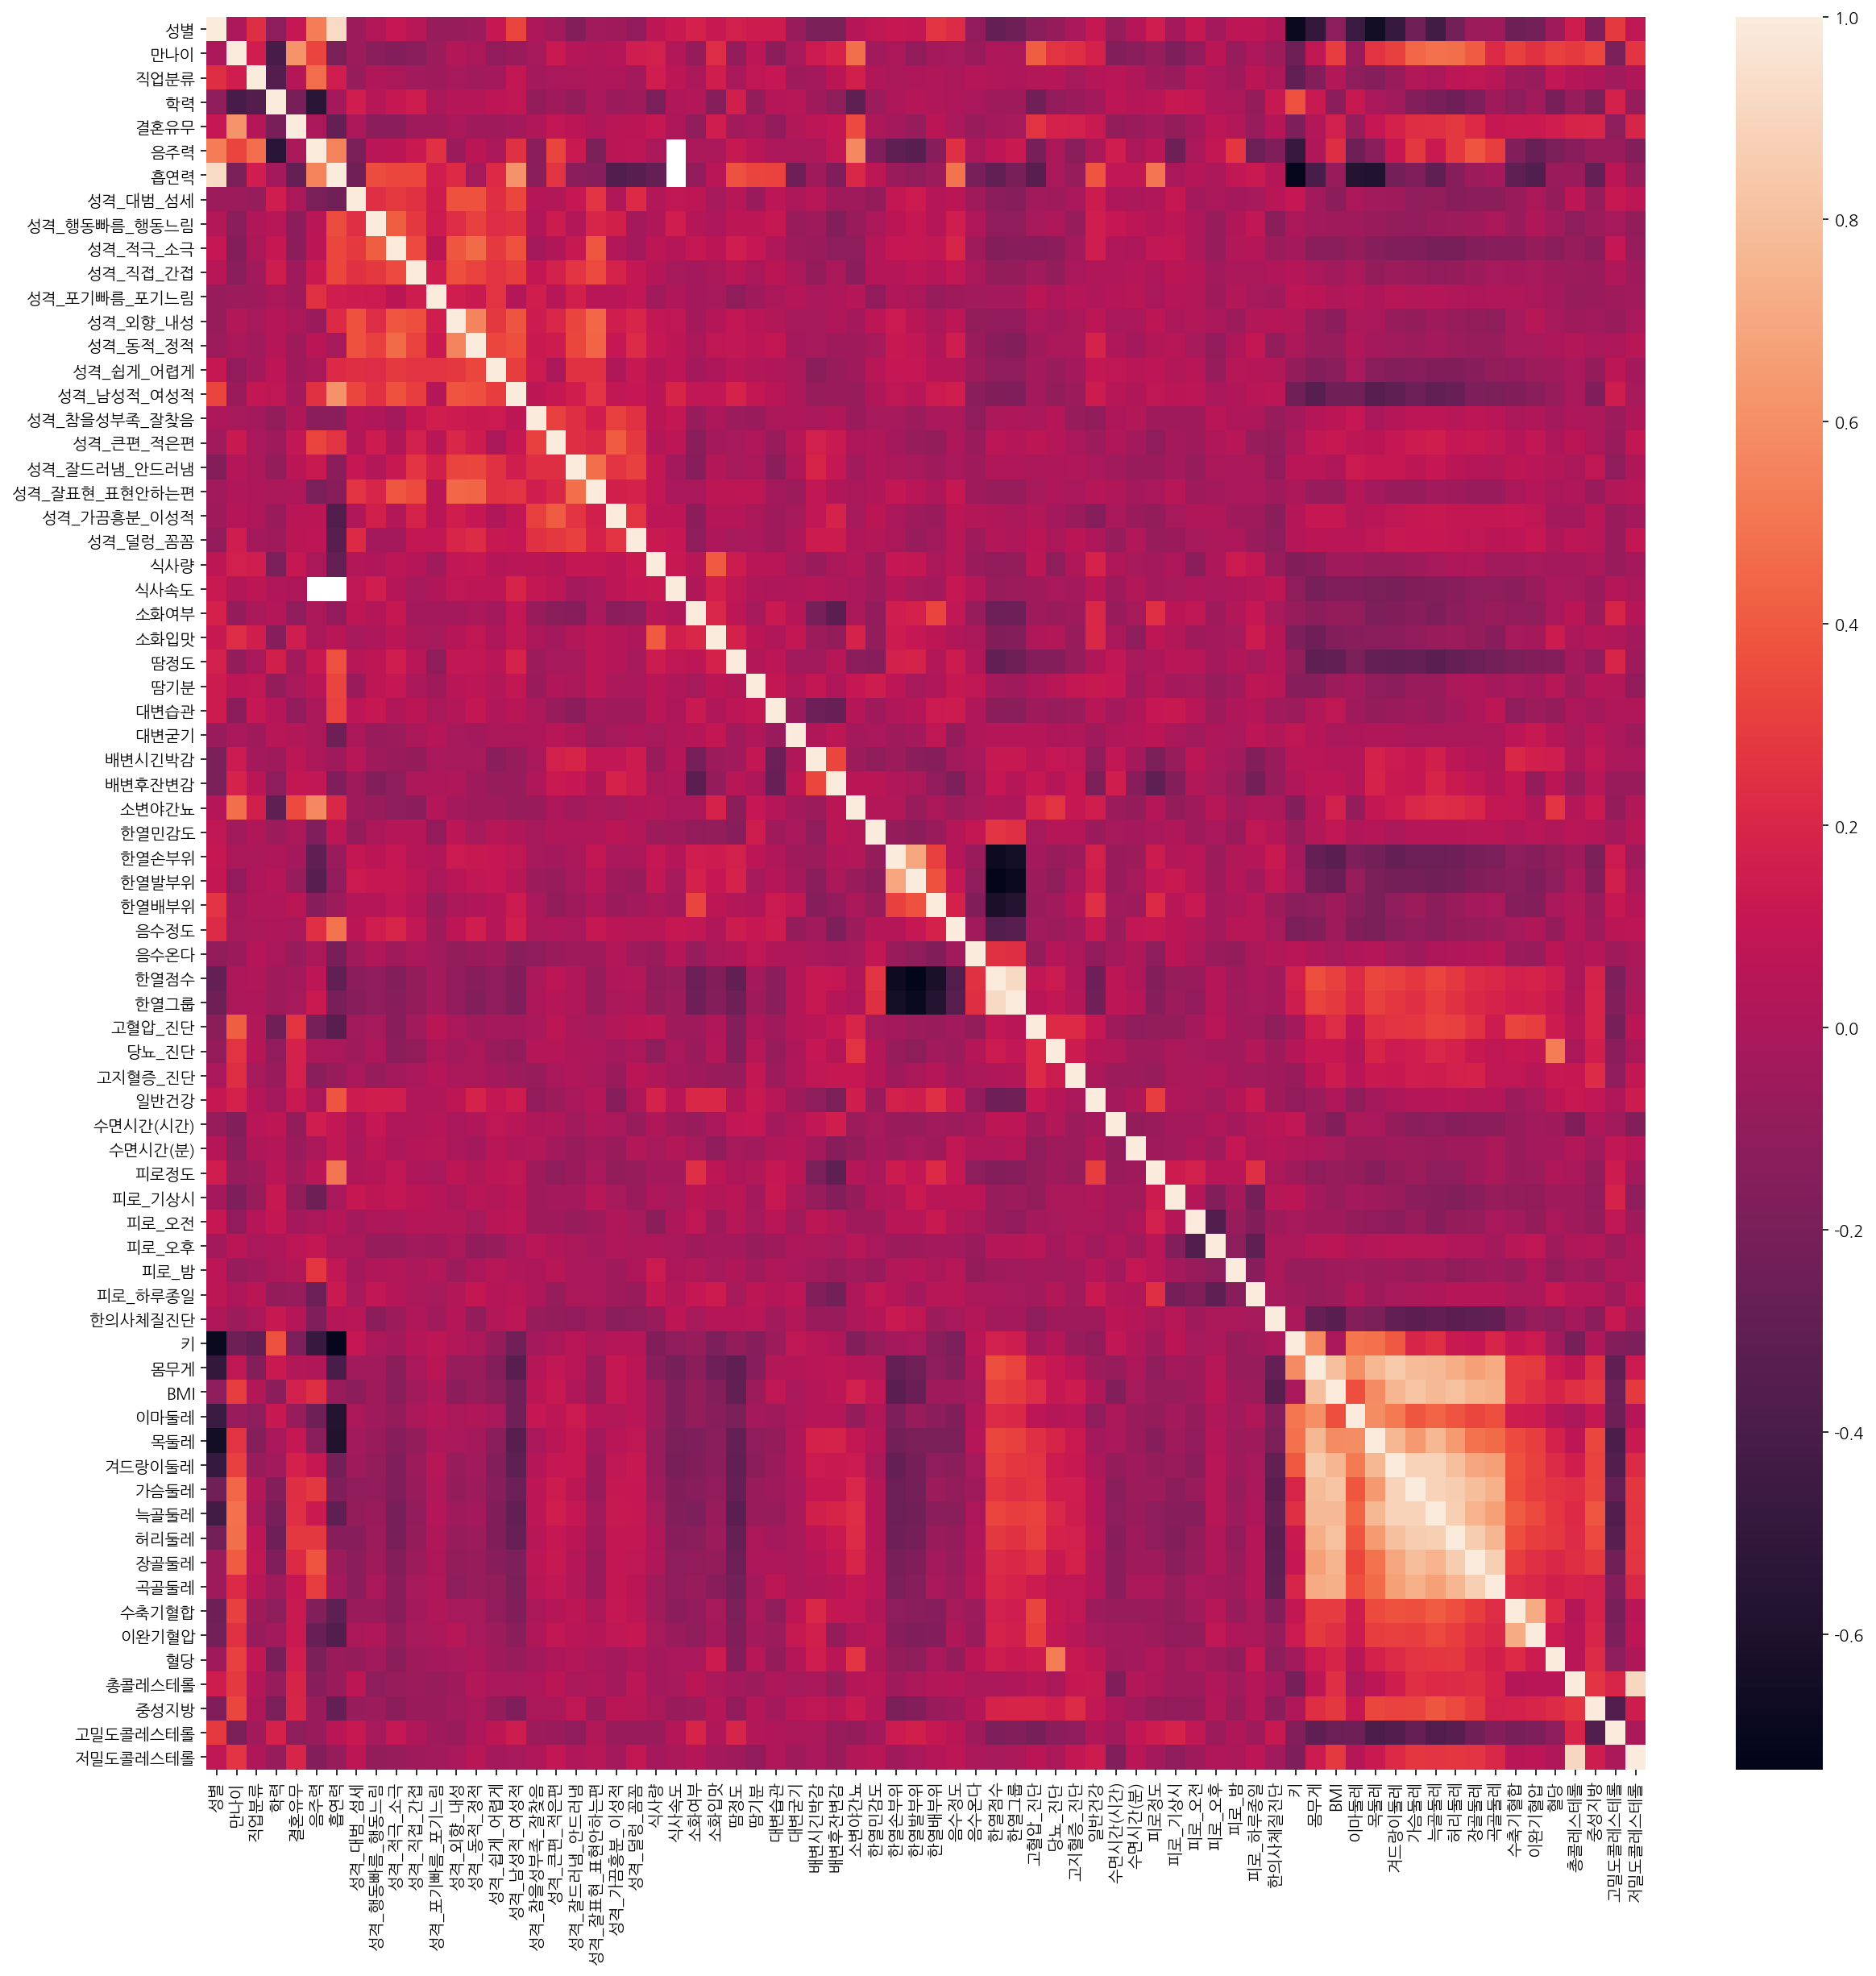

In [14]:
# 위에서 구한 상관계수를 heatmap을 통해 표현해 봅니다.
## 데이터프레임을 통째로 넣어준다.
plt.figure(figsize=(20,20))
sns.heatmap(df_corr)